<a href="https://colab.research.google.com/github/d0bando/Personal-Projects/blob/main/Box_Office_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **TASK: WE WANT TO PREDICT THE BOX OFFICE INCOME FOR A CERTAIN MOVIE**

 [BOX OFFICE REVENUE COMPETITION FROM KAGGLE](https://www.kaggle.com/c/tmdb-box-office-prediction) 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# IMPORT FILES FROM DRIVE INTO GOOGLE-COLAB:

# STEP-1: Code to read csv file into colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# STEP-3: Get File from Drive using file-ID
downloaded1 = drive.CreateFile({'id':'15m9lha0SNk48aJHgbM9yyYbvvaQvWZZJ'}) # replace the id with id of file you want to access
downloaded1.GetContentFile('train.csv') 
downloaded2 = drive.CreateFile({'id':'1uNZI-s98s9SaI-m6lOvD1_8j9mhi6Aq5'}) # replace the id with id of file you want to access
downloaded2.GetContentFile('test.csv') 

# STEP-4: Read File
train = pd.read_csv('train.csv',index_col="id") 
test = pd.read_csv('test.csv',index_col="id")

#Repeat STEPs 3 & 4 to load as many files as you require.

# **SUMMARY**

In [2]:
print("Train have %i rows and %i columns"%(train.shape[0],train.shape[1]))
train.head()

Train have 3000 rows and 22 columns


,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
print("Test have %i rows and %i columns"%(test.shape[0],test.shape[1]))
test.head()

Test have 4398 rows and 21 columns


,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
id,,,,,,,,,,,,,,,,,,,,,
3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  604 non-null    object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   overview               2992 non-null   object 
 8   popularity             3000 non-null   float64
 9   poster_path            2999 non-null   object 
 10  production_companies   2844 non-null   object 
 11  production_countries   2945 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       2980 non-null   object 
 15  stat

In [5]:
train.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


In [6]:
train.describe(include="object")

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
count,604,2993,946,3000,3000,3000,2992,2999,2844,2945,3000,2980,3000,2403,3000,2724,2987,2984
unique,422,872,941,3000,36,2975,2992,2999,2383,321,2398,401,2,2400,2969,2648,2975,2984
top,"[{'id': 645, 'name': 'James Bond Collection', ...","[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0466893,en,Casino Royale,An adaptation of Bishop T.D. Jakes' self-help ...,/4VZtpwdhHQSa4LUkvujyGAHb1hG.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/15,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Loose Cannons,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe4641c3a36847f80f4acd', 'de..."
freq,16,266,4,1,2575,2,1,1,51,1752,5,1817,2996,3,2,27,13,1


# **EXPLORATORY DATA ANALYSIS AND MISSING VALUES**

## Target variable

In [7]:
target = ["revenue"]
y=train.revenue
y

id
1        12314651
2        95149435
3        13092000
4        16000000
5         3923970
          ...    
2996      1596687
2997       180590
2998     89456761
2999    171963386
3000     82087155
Name: revenue, Length: 3000, dtype: int64

In [8]:
y.sort_values()

id
348              1
1755             1
1918             1
1875             1
696              2
           ...    
2323    1123746996
685     1262886337
2771    1405403694
1762    1506249360
1127    1519557910
Name: revenue, Length: 3000, dtype: int64

we can see a wide range of values, searching online we see that revenue is in million dolars

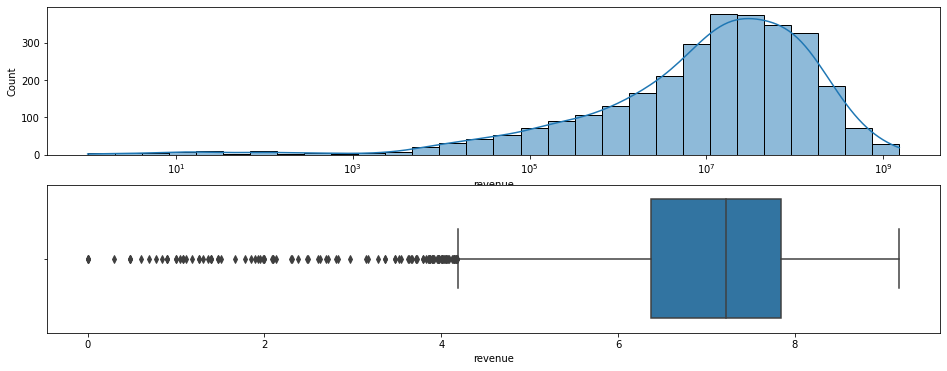

In [9]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(data=y,ax=ax[0],log_scale=True,bins=30,kde=True)
sns.boxplot(x=np.log10(y),ax=ax[1])

## Column names and data types

In [10]:
train.dtypes.sort_values()

revenue                    int64
budget                     int64
popularity               float64
runtime                  float64
cast                      object
Keywords                  object
title                     object
tagline                   object
status                    object
spoken_languages          object
release_date              object
belongs_to_collection     object
crew                      object
poster_path               object
overview                  object
original_title            object
original_language         object
imdb_id                   object
homepage                  object
genres                    object
production_countries      object
production_companies      object
dtype: object

In [11]:
num_cols=train.select_dtypes(exclude=np.object).drop("revenue",axis=1).columns.tolist()
obj_cols=train.select_dtypes(include=np.object).columns.tolist()
print("Numerical Columns:", num_cols)
print("\n")
print("Object Columns:", obj_cols)

Numerical Columns: ['budget', 'popularity', 'runtime']


Object Columns: ['belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']


## Numerical colums

we can see that only "runtime" have 2 missing values, but also has values with 0, equal than budget. popularity seems to be good

In [12]:
train[num_cols].describe()

,budget,popularity,runtime
count,3.000000e+03,3000.000000,2998.000000
mean,2.253133e+07,8.463274,107.856571
std,3.702609e+07,12.104000,22.086434
min,0.000000e+00,0.000001,0.000000
25%,0.000000e+00,4.018053,94.000000
50%,8.000000e+06,7.374861,104.000000
75%,2.900000e+07,10.890983,118.000000
max,3.800000e+08,294.337037,338.000000


replacing 0 with NaN we have many missing values in budget

In [13]:
num_cols_process=train[num_cols].replace(0,np.nan)
num_cols_process

,budget,popularity,runtime
id,,,
1,14000000.0,6.575393,93.0
2,40000000.0,8.248895,113.0
3,3300000.0,64.299990,105.0
4,1200000.0,3.174936,122.0
5,NaN,1.148070,118.0
...,...,...,...
2996,NaN,9.853270,102.0
2997,NaN,3.727996,102.0
2998,65000000.0,14.482345,120.0


resume the process for test

In [14]:
def Num_process(df):
  df=df.copy()
  df[num_cols]=df[num_cols].replace(0,np.nan)
  return df[num_cols]
Num_process(test)

,budget,popularity,runtime
id,,,
3001,NaN,3.851534,90.0
3002,88000.0,3.559789,65.0
3003,NaN,8.085194,100.0
3004,6800000.0,8.596012,130.0
3005,2000000.0,3.217680,92.0
...,...,...,...
7394,42000000.0,9.970359,118.0
7395,19000000.0,6.046516,95.0
7396,16000000.0,9.596883,129.0


## Categorical columns

**because there're not so many columns, we can analyze one by  one:**


---


dictionary columns: 

"belongs_to_collection","genres","production_companies","production_countries","spoken_languages","Keywords","cast","crew".

Not usefull columns:

 "homepage","imdb_id","original_title","overview","poster_path","status","tagline","title"

In [15]:
train[obj_cols].head(2)

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
id,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
2,"[{'id': 107674, 'name': 'The Princess Diaries ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."


In [16]:
dict_cols=["belongs_to_collection","genres","production_companies","production_countries","spoken_languages","Keywords","cast","crew"]
drop_cols=["homepage","imdb_id","original_title","overview","poster_path","status","tagline","title"]

there are 2 columns left, the "original_language" its good for label enconding  and the "release_date" can be separated into year, month and weekday

In [17]:
train.drop(dict_cols+drop_cols+num_cols+target,axis=1)

,original_language,release_date
id,,
1,en,2/20/15
2,en,8/6/04
3,en,10/10/14
4,hi,3/9/12
5,ko,2/5/09
...,...,...
2996,en,4/22/94
2997,sv,3/28/13
2998,en,10/11/96


### Processing "original_language"

In [18]:
orlan_labels = train.original_language.value_counts().index.tolist()
print(orlan_labels)

['en', 'fr', 'ru', 'es', 'hi', 'ja', 'it', 'ko', 'cn', 'zh', 'de', 'ta', 'sv', 'nl', 'pt', 'da', 'fa', 'ro', 'hu', 'tr', 'ml', 'no', 'pl', 'fi', 'te', 'vi', 'sr', 'he', 'el', 'mr', 'ur', 'bn', 'ar', 'nb', 'cs', 'id']


In [19]:
def label_encoder(word,labels):
  return labels.index(word)+1
original_language_le=train.original_language.apply(lambda x: label_encoder(x,orlan_labels) if x in orlan_labels else 0)
original_language_le

id
1        1
2        1
3        1
4        5
5        8
        ..
2996     1
2997    13
2998     1
2999     1
3000     1
Name: original_language, Length: 3000, dtype: int64

resume the process for test

In [20]:
def OriLan_process(df):
  df=df.copy()
  def label_encoder(word,labels):
    return labels.index(word)+1
  original_language_le=df.original_language.apply(lambda x: label_encoder(x,orlan_labels) if x in orlan_labels else 37)
  return original_language_le.to_frame()
OriLan_process(test)

,original_language
id,
3001,6
3002,1
3003,1
3004,2
3005,1
...,...
7394,1
7395,1
7396,1


### Processing "release_date"

In [21]:
train.release_date

id
1        2/20/15
2         8/6/04
3       10/10/14
4         3/9/12
5         2/5/09
          ...   
2996     4/22/94
2997     3/28/13
2998    10/11/96
2999     1/16/04
3000     9/22/11
Name: release_date, Length: 3000, dtype: object

In [22]:
def to_date(x):
  import datetime
  dd = datetime.datetime.strptime(x,'%m/%d/%y')
  if dd.year > 2019:
    dd = dd.replace(year=dd.year-100)
  return dd

In [23]:
release_date=train.release_date.apply(to_date)
release_date

id
1      2015-02-20
2      2004-08-06
3      2014-10-10
4      2012-03-09
5      2009-02-05
          ...    
2996   1994-04-22
2997   2013-03-28
2998   1996-10-11
2999   2004-01-16
3000   2011-09-22
Name: release_date, Length: 3000, dtype: datetime64[ns]

In [24]:
rd_year=release_date.dt.year
rd_year.name="date_year"
rd_year

id
1       2015
2       2004
3       2014
4       2012
5       2009
        ... 
2996    1994
2997    2013
2998    1996
2999    2004
3000    2011
Name: date_year, Length: 3000, dtype: int64

In [25]:
rd_month=release_date.dt.month
rd_month.name="date_month"
rd_month

id
1        2
2        8
3       10
4        3
5        2
        ..
2996     4
2997     3
2998    10
2999     1
3000     9
Name: date_month, Length: 3000, dtype: int64

In [26]:
rd_dayofweek=release_date.dt.dayofweek
rd_dayofweek.name="date_dayofweek"
rd_dayofweek

id
1       4
2       4
3       4
4       4
5       3
       ..
2996    4
2997    3
2998    4
2999    4
3000    3
Name: date_dayofweek, Length: 3000, dtype: int64

In [27]:
rd_dayofmonth=release_date.dt.day
rd_dayofmonth.name="date_dayofmonth"
rd_dayofmonth

id
1       20
2        6
3       10
4        9
5        5
        ..
2996    22
2997    28
2998    11
2999    16
3000    22
Name: date_dayofmonth, Length: 3000, dtype: int64

In [28]:
release_date_processed=pd.concat([rd_year,rd_month,rd_dayofweek,rd_dayofmonth],axis=1)
release_date_processed

,date_year,date_month,date_dayofweek,date_dayofmonth
id,,,,
1,2015,2,4,20
2,2004,8,4,6
3,2014,10,4,10
4,2012,3,4,9
5,2009,2,3,5
...,...,...,...,...
2996,1994,4,4,22
2997,2013,3,3,28
2998,1996,10,4,11


resume the process for test (in test there's 1 missing value, so it was fill with ffill method)

In [29]:
def RelDat_process(df):
  df=df.copy()
  def to_date(x):
    import datetime
    dd = datetime.datetime.strptime(x,'%m/%d/%y')
    if dd.year > 2019:
      dd = dd.replace(year=dd.year-100)
    return dd
  df.fillna(method="ffill",inplace=True)
  release_date=df.release_date.apply(to_date)
  rd_year=release_date.dt.year
  rd_year.name="date_year"
  rd_month=release_date.dt.month
  rd_month.name="date_month"
  rd_dayofweek=release_date.dt.dayofweek
  rd_dayofweek.name="date_dayofweek"
  rd_dayofmonth=release_date.dt.day
  rd_dayofmonth.name="date_dayofmonth"
  release_date_processed=pd.concat([rd_year,rd_month,rd_dayofweek,rd_dayofmonth],axis=1)
  return release_date_processed
RelDat_process(test)

,date_year,date_month,date_dayofweek,date_dayofmonth
id,,,,
3001,2007,7,5,14
3002,1958,5,0,19
3003,1997,5,4,23
3004,2010,9,5,4
3005,2005,2,4,11
...,...,...,...,...
7394,2001,8,4,3
7395,2004,8,4,20
7396,1982,12,2,8


In [30]:
type(0)

int

In [31]:
test.release_date

id
3001    7/14/07
3002    5/19/58
3003    5/23/97
3004     9/4/10
3005    2/11/05
         ...   
7394     8/3/01
7395    8/20/04
7396    12/8/82
7397     2/4/15
7398    9/20/62
Name: release_date, Length: 4398, dtype: object



---


### **now we will see what the dictionaries contains**




---




In [32]:
# function to transform a Series made of dictionaries to a dataframe
def dic_to_dataframe(column):
  new_dataframe=pd.DataFrame()
  for i,index in zip(column,column.index):
    dataf_i=pd.DataFrame(i)
    dataf_ori_id=pd.DataFrame([index for _ in range(len(i))],columns=["original_id"])
    dataf_oriid_plus_i=pd.concat([dataf_i,dataf_ori_id],axis=1)
    new_dataframe=pd.concat([new_dataframe,dataf_oriid_plus_i],ignore_index=True)
  return new_dataframe 


In [33]:
#"belong_to_collection" column it's useless, we will drop it
dic_to_dataframe(train.belongs_to_collection.dropna().map(eval)).head()

,id,name,poster_path,backdrop_path,original_id
0,313576,Hot Tub Time Machine Collection,/iEhb00TGPucF0b4joM1ieyY026U.jpg,/noeTVcgpBiD48fDjFVic1Vz7ope.jpg,1
1,107674,The Princess Diaries Collection,/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg,/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg,2
2,256377,The Muppet Collection,/8Ew8EIdFFurMMYjSbWPu1Hl4vLX.jpg,/1AWd3MM90G47mxtD112gRDxSXY9.jpg,9
3,1575,Rocky Collection,/mCY5dMkSSFQufGCViI6jNUU6pXq.jpg,/w4h6gjdWPvmu5R9H6zeGDPo1ZuV.jpg,11
4,48190,Revenge of the Nerds Collection,/qOnoXEdrSnBuS3FMAFRIgyJSM2r.jpg,None,12


In [34]:
# "genres" is usefull, wi will make a one hot encoding with this later
genres_dataframe=dic_to_dataframe(train.genres.dropna().map(eval))
genres_dataframe.head()

,id,name,original_id
0,35,Comedy,1
1,35,Comedy,2
2,18,Drama,2
3,10751,Family,2
4,10749,Romance,2


In [35]:
# the most common companies probably had influence, so we will do a one hot enconder later
pcompanies_dataframe=dic_to_dataframe(train.production_companies.dropna().map(eval))
pcompanies_dataframe.head()

,name,id,original_id
0,Paramount Pictures,4,1
1,United Artists,60,1
2,Metro-Goldwyn-Mayer (MGM),8411,1
3,Walt Disney Pictures,2,2
4,Bold Films,2266,3


In [36]:
# the most common countries probably had influence too, so we will label encoding this later
pcountries_dataframe=dic_to_dataframe(train.production_countries.dropna().map(eval))
pcountries_dataframe.head()

,iso_3166_1,name,original_id
0,US,United States of America,1
1,US,United States of America,2
2,US,United States of America,3
3,IN,India,4
4,KR,South Korea,5


In [37]:
# original languages already are in the "original_language" column, this dictionary is useless
dic_to_dataframe(train.spoken_languages.dropna().map(eval)).head()

,iso_639_1,name,original_id
0,en,English,1
1,en,English,2
2,en,English,3
3,en,English,4
4,hi,हिन्दी,4


In [38]:
# too complex to process, gotta drop it
keywords_dataframe=dic_to_dataframe(train.Keywords.dropna().map(eval))
print("there are %i diferent keywords in this dataset"%(len(keywords_dataframe.name.unique())))
keywords_dataframe.head()

there are 7400 diferent keywords in this dataset


,id,name,original_id
0,4379,time travel,1
1,9663,sequel,1
2,11830,hot tub,1
3,179431,duringcreditsstinger,1
4,2505,coronation,2


In [39]:
# I am going to avoid this dataset, I will use it only if it is 
# necessary to improve the performance of the model
dic_to_dataframe(train.cast.dropna().map(eval)).head()

,cast_id,character,credit_id,gender,id,name,order,profile_path,original_id
0,4.0,Lou,52fe4ee7c3a36847f82afae7,2.0,52997.0,Rob Corddry,0.0,/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg,1
1,5.0,Nick,52fe4ee7c3a36847f82afaeb,2.0,64342.0,Craig Robinson,1.0,/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg,1
2,6.0,Jacob,52fe4ee7c3a36847f82afaef,2.0,54729.0,Clark Duke,2.0,/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg,1
3,7.0,Adam Jr.,52fe4ee7c3a36847f82afaf3,2.0,36801.0,Adam Scott,3.0,/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg,1
4,8.0,Hot Tub Repairman,52fe4ee7c3a36847f82afaf7,2.0,54812.0,Chevy Chase,4.0,/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg,1


In [40]:
# I am going to avoid this dataset too, I will use it only if it is 
# necessary to improve the performance of the model
dic_to_dataframe(train.crew.dropna().map(eval)).head()

,credit_id,department,gender,id,job,name,profile_path,original_id
0,59ac067c92514107af02c8c8,Directing,0,1449071,First Assistant Director,Kelly Cantley,None,1
1,52fe4ee7c3a36847f82afad7,Directing,2,3227,Director,Steve Pink,/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg,1
2,5524ed25c3a3687ded000d88,Writing,2,347335,Writer,Josh Heald,/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg,1
3,5524ed2d925141720c001128,Writing,2,347335,Characters,Josh Heald,/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg,1
4,5524ed3d92514166c1004a5d,Production,2,57822,Producer,Andrew Panay,None,1


In [41]:
# so only going to use this dictionaries columns
usefull_dict_cols=["genres","production_companies","production_countries"]
drop_dicts=['belongs_to_collection','spoken_languages','Keywords','cast','crew']

In [42]:
train[usefull_dict_cols].isna().sum()

genres                    7
production_companies    156
production_countries     55
dtype: int64

### Processing "genres" 

In [43]:
# looking for missing values(dictionaries)
train.genres.isna().sum()

7

In [44]:
genres_dataframe=dic_to_dataframe(train.genres.fillna("[{'id':np.nan,'name':np.nan}]").map(eval))
genres_dataframe

,id,name,original_id
0,35.0,Comedy,1
1,35.0,Comedy,2
2,18.0,Drama,2
3,10751.0,Family,2
4,10749.0,Romance,2
...,...,...,...
7513,35.0,Comedy,2999
7514,10749.0,Romance,2999
7515,53.0,Thriller,3000
7516,28.0,Action,3000


In [45]:
# now transform to one hot encoding for every genre, excluding "id" and grouping by "original_id"
genres_dataframe_ohe=pd.get_dummies(genres_dataframe.drop("id",axis=1),prefix="genre",dummy_na=True).groupby("original_id").sum()
genres_dataframe_ohe

,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,genre_nan
original_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2997,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2998,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


add a column with the count of genres

missing values are contained in "genres_sum" in 0 values

In [46]:
genres_dataframe_ohe["genres_sum"]=genres_dataframe_ohe.drop("genre_nan",axis=1).sum(axis=1)
genres_dataframe_ohe

,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,genre_nan,genres_sum
original_id,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,4
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
2997,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
2998,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,4


we select genres with more than 100 entries

In [47]:
i=genres_dataframe_ohe.sum().sort_values()
principal_genres=i[i>100].index.tolist()
i

genre_TV Movie              1
genre_nan                   7
genre_Foreign              31
genre_Western              43
genre_Documentary          87
genre_Music               100
genre_War                 100
genre_History             132
genre_Animation           141
genre_Mystery             225
genre_Fantasy             232
genre_Family              260
genre_Science Fiction     290
genre_Horror              301
genre_Adventure           439
genre_Crime               469
genre_Romance             571
genre_Action              741
genre_Thriller            789
genre_Comedy             1028
genre_Drama              1531
genres_sum               7511
dtype: int64

In [48]:
genres_dataframe_ohe = genres_dataframe_ohe[principal_genres]
genres_dataframe_ohe

,genre_History,genre_Animation,genre_Mystery,genre_Fantasy,genre_Family,genre_Science Fiction,genre_Horror,genre_Adventure,genre_Crime,genre_Romance,genre_Action,genre_Thriller,genre_Comedy,genre_Drama,genres_sum
original_id,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,1,0,0,0,0,1,0,0,1,1,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2
5,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
2997,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
2998,0,0,1,0,0,0,0,0,1,0,1,1,0,0,4


resume the process for test

In [49]:
def Gen_process(df):
  df=df.copy()
  genres_dataframe=dic_to_dataframe(df.genres.fillna("[{'name':np.nan}]").map(eval))
  dummies=pd.get_dummies(genres_dataframe.drop("id",axis=1),prefix="genre",dummy_na=True)
  genres_dataframe_ohe=dummies.groupby("original_id").sum()
  genres_dataframe_ohe["genres_sum"]=genres_dataframe_ohe.drop("genre_nan",axis=1).sum(axis=1)
  genres_dataframe_ohe = genres_dataframe_ohe[principal_genres]
  return genres_dataframe_ohe
Gen_process(test)

,genre_History,genre_Animation,genre_Mystery,genre_Fantasy,genre_Family,genre_Science Fiction,genre_Horror,genre_Adventure,genre_Crime,genre_Romance,genre_Action,genre_Thriller,genre_Comedy,genre_Drama,genres_sum
original_id,,,,,,,,,,,,,,,
3001,0,1,0,1,1,0,0,1,0,0,0,0,0,0,4
3002,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2
3003,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
3004,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3
3005,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7395,0,0,0,0,0,0,0,1,0,0,1,1,1,0,4
7396,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


### Processing "production_companies"

In [50]:
# looking for missing values(dictionaries)
train.production_companies.isna().sum()

156

In [51]:
pcompanies_dataframe=dic_to_dataframe(train.production_companies.fillna("[{'name':np.nan}]").map(eval))
pcompanies_dataframe

,name,id,original_id
0,Paramount Pictures,4.0,1
1,United Artists,60.0,1
2,Metro-Goldwyn-Mayer (MGM),8411.0,1
3,Walt Disney Pictures,2.0,2
4,Bold Films,2266.0,3
...,...,...,...
8246,Vertigo Entertainment,829.0,3000
8247,Gotham Group,3672.0,3000
8248,Tailor Made,24557.0,3000
8249,Mango Farms,24558.0,3000


number of production companies per movie

missing values are contained in "companies_sum" in 0 values

In [52]:
companies_sum=pcompanies_dataframe.groupby("original_id")["name"].count()
companies_sum.name="companies_sum"
companies_sum.value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: companies_sum, dtype: int64

with n=10 this are the 10 companies with most number of films

In [53]:
n=10
val_counts=pcompanies_dataframe["name"].value_counts()
most_common_comp=val_counts.iloc[:n].index.tolist()
most_common_comp

['Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'New Line Cinema',
 'Touchstone Pictures',
 'Walt Disney Pictures',
 'Columbia Pictures Corporation']

In [54]:
# n is the n first companies that has most amount of films 
# the rest of them will be grouped in "other"
def most_n_important(df,col_name,n_common_list,other_name="other"):
  df=df.copy()
  most_common=n_common_list
  def filter(x): # filter function to keep most common companies, else go to "other"
    if pd.notna(x):
      if x not in most_common:
        return other_name
      else:
        return x
    else:
      return x  
  df[col_name] = df[col_name].apply(filter)
  return df

In [55]:
pc_mni = most_n_important(pcompanies_dataframe,col_name="name",n_common_list=most_common_comp,other_name="other")
pc_mni

,name,id,original_id
0,Paramount Pictures,4.0,1
1,other,60.0,1
2,Metro-Goldwyn-Mayer (MGM),8411.0,1
3,Walt Disney Pictures,2.0,2
4,other,2266.0,3
...,...,...,...
8246,other,829.0,3000
8247,other,3672.0,3000
8248,other,24557.0,3000
8249,other,24558.0,3000


In [56]:
# now to one hot enconding, dropping "id" and grouping by the original id
pcompanies_dataframe_ohe=pd.get_dummies(pc_mni.drop("id",axis=1),prefix="comp").groupby("original_id").sum()
pcompanies_dataframe_ohe=pcompanies_dataframe_ohe.drop("comp_other",axis=1)
pcompanies_dataframe_ohe=pd.concat([pcompanies_dataframe_ohe,companies_sum],axis=1)
pcompanies_dataframe_ohe

,comp_Columbia Pictures,comp_Columbia Pictures Corporation,comp_Metro-Goldwyn-Mayer (MGM),comp_New Line Cinema,comp_Paramount Pictures,comp_Touchstone Pictures,comp_Twentieth Century Fox Film Corporation,comp_Universal Pictures,comp_Walt Disney Pictures,comp_Warner Bros.,companies_sum
original_id,,,,,,,,,,,
1,0,0,1,0,1,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,1,2
2997,0,0,0,0,0,0,0,0,0,0,2
2998,0,0,0,1,0,0,0,0,0,0,3


resume the process for test

In [57]:
def PCom_process(df):
  df=df.copy()
  pcomp_df=dic_to_dataframe(df.production_companies.fillna("[{'name':np.nan}]").map(eval))
  companies_sum=pcomp_df.groupby("original_id")["name"].count()
  companies_sum.name="companies_sum"
  pcomp_df_mni = most_n_important(pcomp_df,col_name="name",n_common_list=most_common_comp,other_name="other")
  dummies=pd.get_dummies(pcomp_df_mni.drop("id",axis=1),prefix="comp")
  pcompanies_dataframe_ohe=dummies.groupby("original_id").sum()
  pcompanies_dataframe_ohe=pcompanies_dataframe_ohe.drop("comp_other",axis=1)
  pcompanies_dataframe_ohe=pd.concat([pcompanies_dataframe_ohe,companies_sum],axis=1)
  return pcompanies_dataframe_ohe
PCom_process(test)

,comp_Columbia Pictures,comp_Columbia Pictures Corporation,comp_Metro-Goldwyn-Mayer (MGM),comp_New Line Cinema,comp_Paramount Pictures,comp_Touchstone Pictures,comp_Twentieth Century Fox Film Corporation,comp_Universal Pictures,comp_Walt Disney Pictures,comp_Warner Bros.,companies_sum
original_id,,,,,,,,,,,
3001,0,0,0,0,0,0,0,0,0,0,0
3002,0,0,0,0,0,0,0,0,0,0,1
3003,0,0,0,0,0,0,0,0,0,1,3
3004,0,0,0,0,0,0,0,0,0,0,3
3005,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7394,0,0,1,0,0,0,0,0,0,0,7
7395,0,0,0,0,1,0,0,0,0,0,2
7396,0,0,0,0,0,0,1,0,0,0,1


the n value can change the performance

### Processing "production_countries"

we do exactly the same process as we do in "production_companies"

In [58]:
train.production_countries.isna().sum()

55

In [59]:
pcountries_dataframe=dic_to_dataframe(train.production_countries.fillna("[{'name':np.nan}]").map(eval))
pcountries_dataframe

,iso_3166_1,name,original_id
0,US,United States of America,1
1,US,United States of America,2
2,US,United States of America,3
3,IN,India,4
4,KR,South Korea,5
...,...,...,...
4029,DK,Denmark,2997
4030,SE,Sweden,2997
4031,US,United States of America,2998
4032,US,United States of America,2999


number of production countries per movie

missing values are contained in "countries_sum" in 0 values

In [60]:
countries_sum=pcountries_dataframe.groupby("original_id")["name"].count()
countries_sum.name="countries_sum"
countries_sum.value_counts()

1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: countries_sum, dtype: int64

In [61]:
n=10
val_counts=pcountries_dataframe["name"].value_counts()
most_common_coun=val_counts.iloc[:n].index.tolist()
most_common_coun

['United States of America',
 'United Kingdom',
 'France',
 'Germany',
 'Canada',
 'India',
 'Italy',
 'Japan',
 'Australia',
 'Russia']

In [62]:
pcou_mni = most_n_important(pcountries_dataframe,col_name="name",n_common_list=most_common_coun,other_name="other")
pcou_mni

,iso_3166_1,name,original_id
0,US,United States of America,1
1,US,United States of America,2
2,US,United States of America,3
3,IN,India,4
4,KR,other,5
...,...,...,...
4029,DK,other,2997
4030,SE,other,2997
4031,US,United States of America,2998
4032,US,United States of America,2999


In [63]:
pcountries_dataframe_ohe=pd.get_dummies(pcou_mni.drop("iso_3166_1",axis=1),prefix="country").groupby("original_id").sum()
pcountries_dataframe_ohe=pcountries_dataframe_ohe.drop("country_other",axis=1)
pcountries_dataframe_ohe=pd.concat([pcountries_dataframe_ohe,countries_sum],axis=1)
pcountries_dataframe_ohe

,country_Australia,country_Canada,country_France,country_Germany,country_India,country_Italy,country_Japan,country_Russia,country_United Kingdom,country_United States of America,countries_sum
original_id,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,1,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,1,1
2997,0,0,0,0,0,0,0,0,0,0,2
2998,0,0,0,0,0,0,0,0,0,1,1


resume process for test

In [64]:
def PCoun_process(df):
  df=df.copy()
  pcoun_df=dic_to_dataframe(df.production_countries.fillna("[{'name':np.nan}]").map(eval))
  countries_sum=pcoun_df.groupby("original_id")["name"].count()
  countries_sum.name="countries_sum"
  pcoun_df_mni = most_n_important(pcoun_df,col_name="name",n_common_list=most_common_coun,other_name="other")
  dummies=pd.get_dummies(pcoun_df_mni.drop("iso_3166_1",axis=1),prefix="country")
  pcountries_dataframe_ohe=dummies.groupby("original_id").sum()
  pcountries_dataframe_ohe=pcountries_dataframe_ohe.drop("country_other",axis=1)
  pcountries_dataframe_ohe=pd.concat([pcountries_dataframe_ohe,countries_sum],axis=1)
  return pcountries_dataframe_ohe
PCoun_process(test)

,country_Australia,country_Canada,country_France,country_Germany,country_India,country_Italy,country_Japan,country_Russia,country_United Kingdom,country_United States of America,countries_sum
original_id,,,,,,,,,,,
3001,0,0,0,0,0,0,1,0,0,1,2
3002,0,0,0,0,0,0,0,0,0,1,1
3003,0,0,0,0,0,0,0,0,0,1,1
3004,0,1,1,0,0,0,0,0,0,0,2
3005,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7394,0,0,1,0,0,0,0,0,0,1,2
7395,0,0,0,0,0,0,0,0,0,1,1
7396,0,0,0,0,0,0,0,0,0,1,1


# DATA VISUALIZATION

now create a general function to transform all dataset

In [65]:
def transform_dataset(df):
  trans_functions = [ 
    Num_process,
    OriLan_process,
    RelDat_process,
    Gen_process,
    PCom_process,
    PCoun_process ]
  X=pd.DataFrame()
  for f in trans_functions:
    X=pd.concat([X,f(df)],axis=1)
  return X
X = transform_dataset(train)
Xy=pd.concat([X,y],axis=1)
Xy.head()

,budget,popularity,runtime,original_language,date_year,date_month,date_dayofweek,date_dayofmonth,genre_History,genre_Animation,genre_Mystery,genre_Fantasy,genre_Family,genre_Science Fiction,genre_Horror,genre_Adventure,genre_Crime,genre_Romance,genre_Action,genre_Thriller,genre_Comedy,genre_Drama,genres_sum,comp_Columbia Pictures,comp_Columbia Pictures Corporation,comp_Metro-Goldwyn-Mayer (MGM),comp_New Line Cinema,comp_Paramount Pictures,comp_Touchstone Pictures,comp_Twentieth Century Fox Film Corporation,comp_Universal Pictures,comp_Walt Disney Pictures,comp_Warner Bros.,companies_sum,country_Australia,country_Canada,country_France,country_Germany,country_India,country_Italy,country_Japan,country_Russia,country_United Kingdom,country_United States of America,countries_sum,revenue
1,14000000.0,6.575393,93.0,1,2015,2,4,20,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,1,12314651
2,40000000.0,8.248895,113.0,1,2004,8,4,6,0,0,0,0,1,0,0,0,0,1,0,0,1,1,4,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,95149435
3,3300000.0,64.299990,105.0,1,2014,10,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,1,13092000
4,1200000.0,3.174936,122.0,5,2012,3,4,9,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,16000000
5,NaN,1.148070,118.0,8,2009,2,3,5,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3923970


## Budget

distribution of the logarithm of "budget" and outliers


there's some outliers with low budget

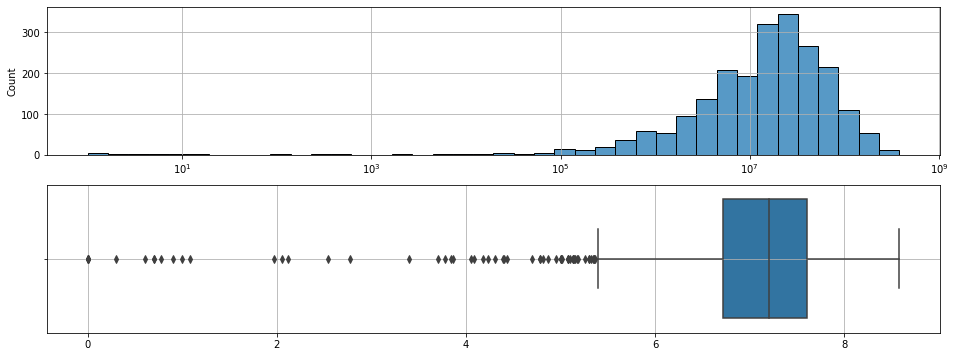

In [66]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(data=X["budget"],ax=ax[0],log_scale=True,bins=40)
sns.boxplot(x=np.log10(X["budget"]),ax=ax[1])
ax[0].set(xlabel=None);
ax[0].grid()
ax[1].set(xlabel=None);
ax[1].grid()

relation between budget and the target

looks like linear correlation

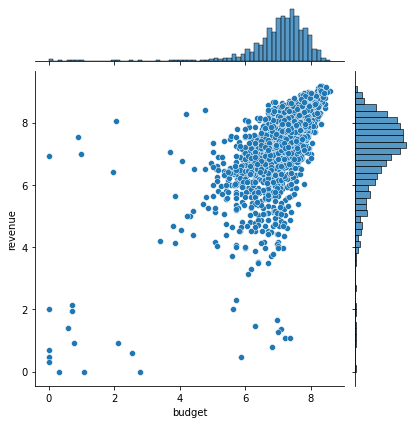

In [67]:
sns.jointplot(x=np.log10(X["budget"]),y=np.log10(y))

## Popularity

distribution of the logarithm of "popularity" and outliers


too many outliers, distribution looks narrow

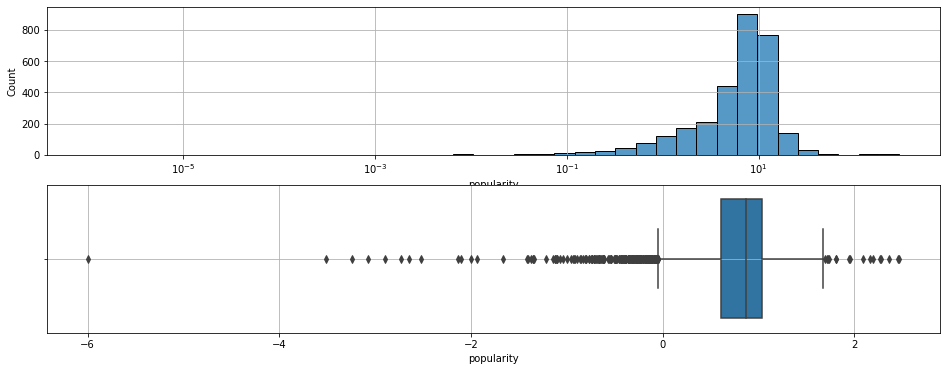

In [68]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(data=X["popularity"],ax=ax[0],log_scale=True,bins=40)
sns.boxplot(x=np.log10(X["popularity"]),ax=ax[1],)
ax[0].grid()
ax[1].grid()

relation between popularity and the target

a little correlation

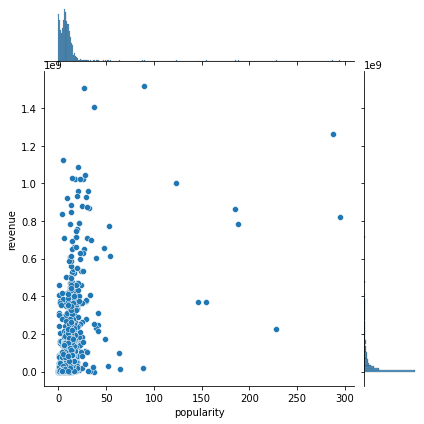

In [69]:
sns.jointplot(x=X["popularity"],y=y)

## Runtime

distribution of "runtime" and outliers




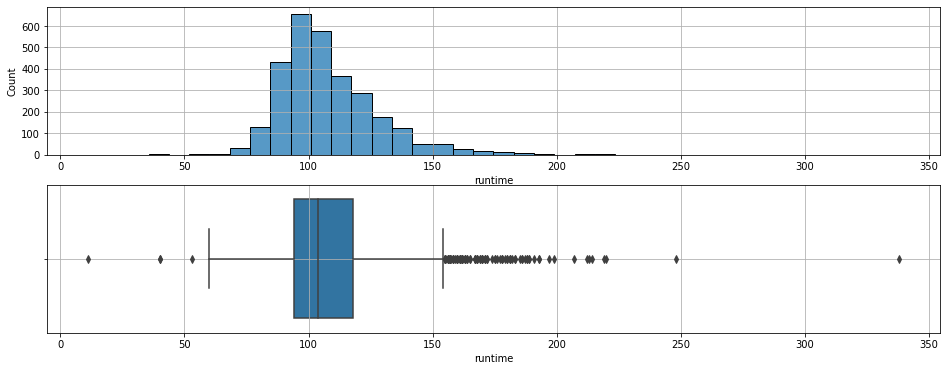

In [70]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(data=X["runtime"],ax=ax[0],bins=40)
sns.boxplot(x=X["runtime"],ax=ax[1],)
ax[0].grid()
ax[1].grid()

relation between runtime and the target

not too correlated

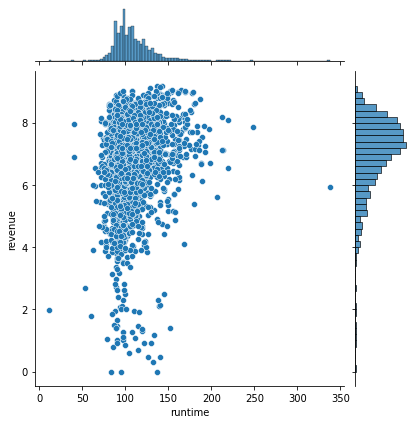

In [71]:
sns.jointplot(x=X["runtime"],y=np.log10(y))

## Original language

at first we can see that english is the predominant language

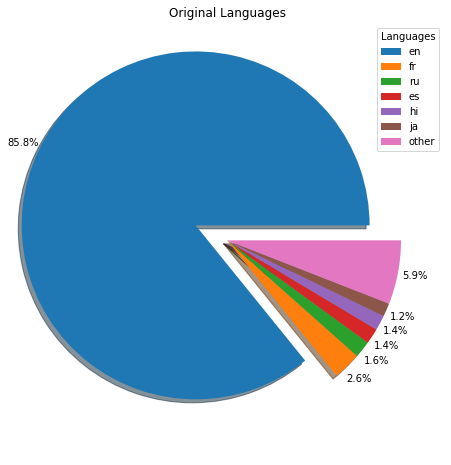

In [72]:
pie=train.original_language.value_counts(normalize=True)

pie_labls=pie.head(6).index.tolist()
pie_labls.append("other")

sizes=pie.head(6).values.tolist()
sizes.append(1-sum(sizes))

explode=[0.2,0,0,0,0,0,0]
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(x=sizes, explode=explode, autopct='%1.1f%%',shadow=True,pctdistance=1.1);
ax.legend(pie_labls,title="Languages")
ax.set_title("Original Languages");

the english language have a wide range, but the rest of all has high income, which means that in the dataset movies with other languages are only the most popular

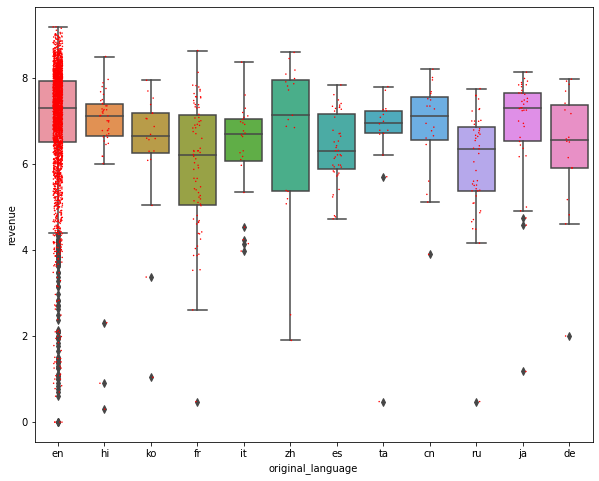

In [73]:
data=pd.concat([train.original_language,np.log10(y)],axis=1)
loc=train.original_language.value_counts().head(12).index
loc=data.original_language.isin(loc)
data=data.loc[loc]

fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(x="original_language",y="revenue",data=data,ax=ax)
sns.stripplot(x="original_language", y="revenue", data=data, color="r", size=1.5,ax=ax)

## Date year

we can see that the number of films per year increase over time

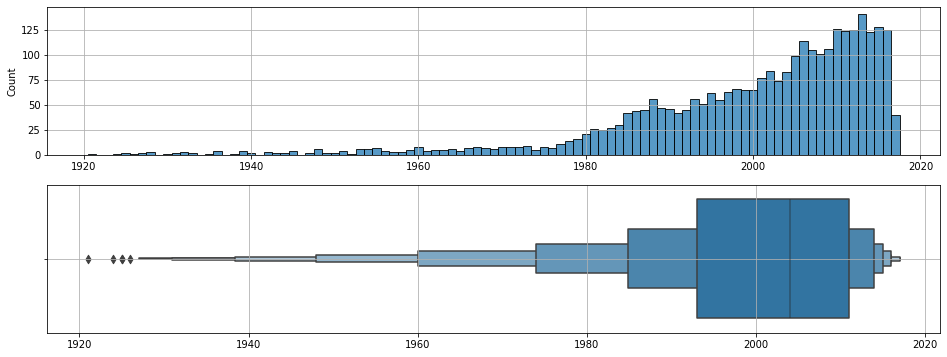

In [74]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(x=X["date_year"],ax=ax[0],discrete=True)
ax[0].set(xlabel=None)
sns.boxenplot(x=X["date_year"],ax=ax[1])
ax[1].set(xlabel=None)
ax[0].grid()
ax[1].grid()

function for units on the scale

In [75]:
import matplotlib.ticker as tick
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    tick_val=tick_val*1000000
    if tick_val >= 1000000000000000:
        val = round(tick_val/1000000000000000, 1)
        new_tick_format = '{:}MB'.format(val)
    elif tick_val >= 1000000000000:
        val = round(tick_val/1000000000000, 1)
        new_tick_format = '{:}kB'.format(val)
    elif tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

as the number of films, revenue increases also over time

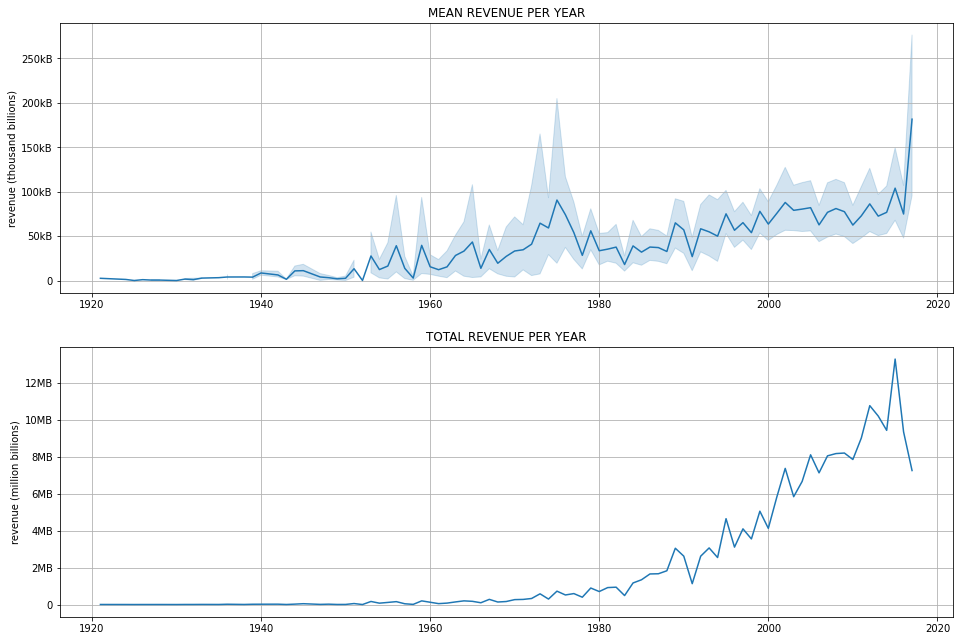

In [76]:
total_r=Xy.groupby("date_year")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.lineplot(x=X.date_year,y=y,ax=ax[0])
ax[0].set_title("MEAN REVENUE PER YEAR")
ax[0].set(xlabel=None,ylabel="revenue (thousand billions)")
ax[0].grid()

sns.lineplot(data=total_r,ax=ax[1])
ax[1].set_title("TOTAL REVENUE PER YEAR")
ax[1].set(xlabel=None,ylabel="revenue (million billions)")
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Date month

The movies in the dataset have no preference for certain release months, but January, April, and September appear to be the worst despite some outliers.

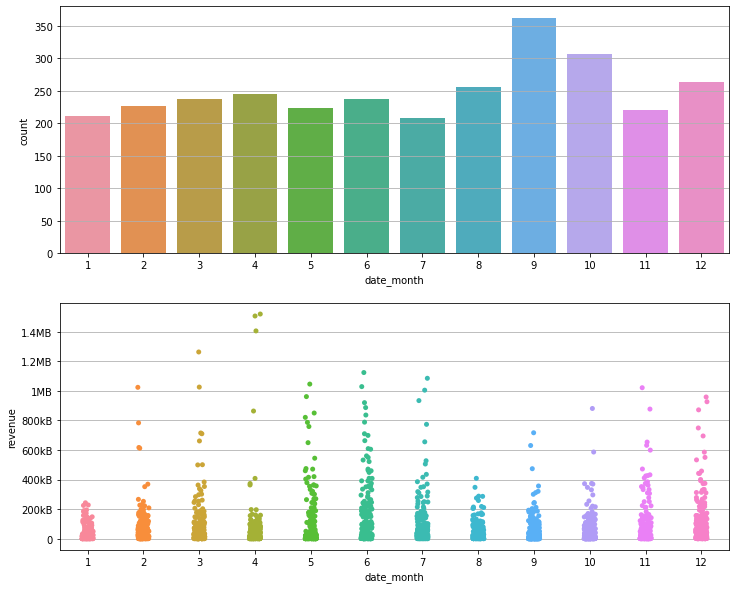

In [77]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))
ax[0].grid()
sns.countplot(x=X["date_month"],ax=ax[0],)
ax[1].grid()
sns.stripplot(x=X["date_month"],y=y,ax=ax[1],)
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

here is a clearly vision of which monts are better than others

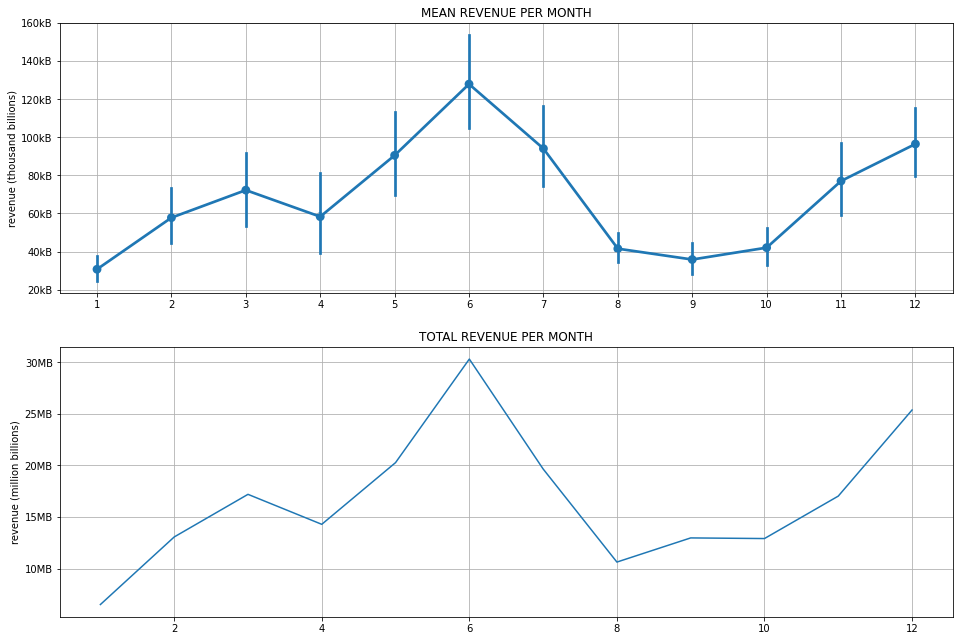

In [78]:
month_total=Xy.groupby("date_month")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.pointplot(data=Xy,x="date_month",y="revenue",ax=ax[0])
ax[0].set_title("MEAN REVENUE PER MONTH")
ax[0].set(xlabel=None,ylabel="revenue (thousand billions)")
ax[0].grid()

sns.lineplot(data=month_total,ax=ax[1])
ax[1].set_title("TOTAL REVENUE PER MONTH")
ax[1].set(xlabel=None,ylabel="revenue (million billions)")
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Date day of week

surpresively wednesday is the day with highest  revenue

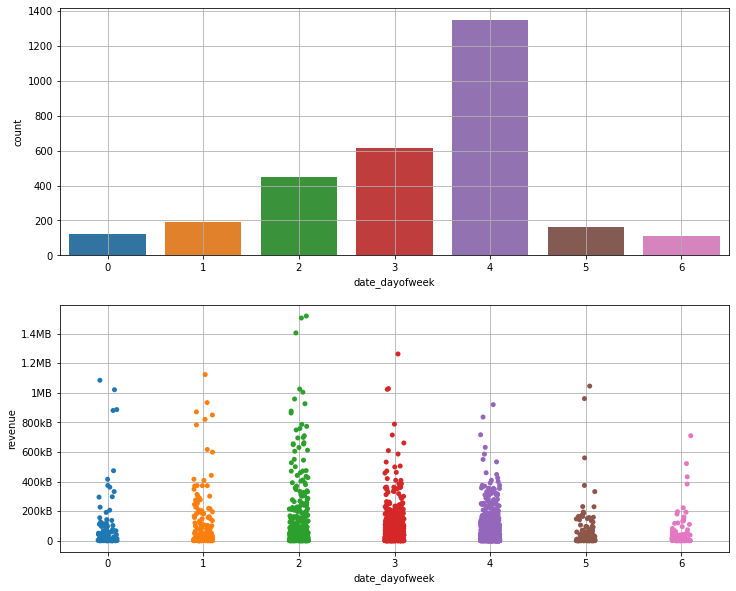

In [79]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["date_dayofweek"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["date_dayofweek"],y=y,ax=ax[1],)
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

It seems like Fridays have more total revenue, but it is because the movies in this dataset are generally released on Fridays and have too many values

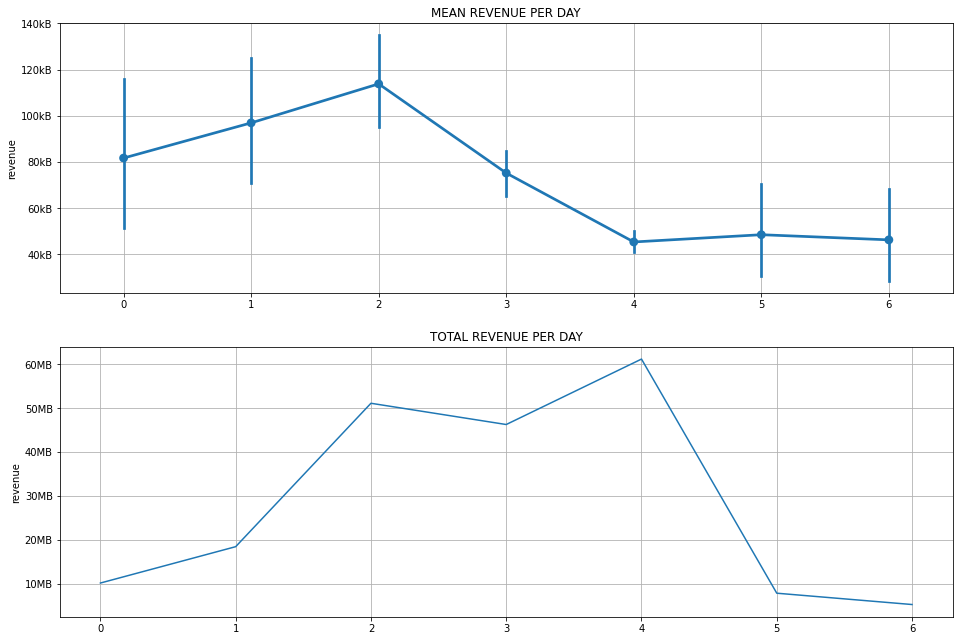

In [80]:
dayw_total=Xy.groupby("date_dayofweek")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.pointplot(data=Xy,x="date_dayofweek",y="revenue",ax=ax[0])
ax[0].set_title("MEAN REVENUE PER DAY")
ax[0].set(xlabel=None)
ax[0].grid()

sns.lineplot(data=dayw_total,ax=ax[1])
ax[1].set_title("TOTAL REVENUE PER DAY")
ax[1].set(xlabel=None)
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Date day of month

days of month are evenly distributed except for 1, probably missing dates was filled at the first dat of the month

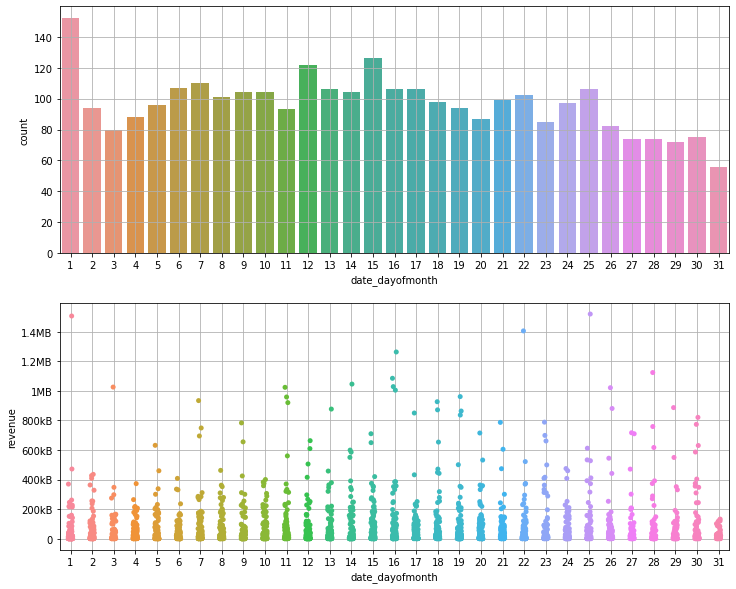

In [81]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["date_dayofmonth"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["date_dayofmonth"],y=y,ax=ax[1],)
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

films released on the mid of the month tend to have more revenue, but ther's no confidence because of variance

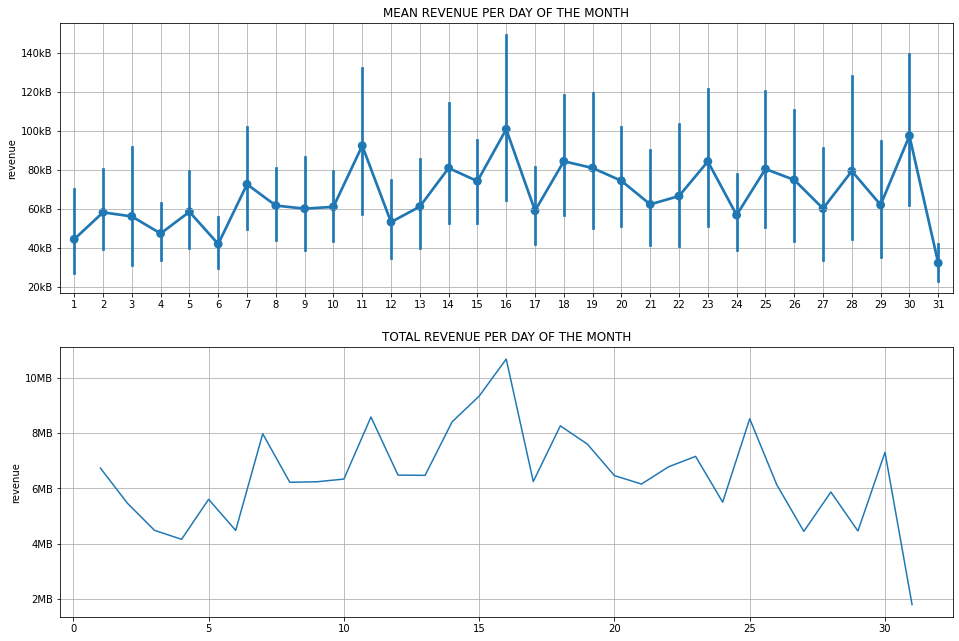

In [82]:
daym_total=Xy.groupby("date_dayofmonth")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.pointplot(data=Xy,x="date_dayofmonth",y="revenue",ax=ax[0],)
ax[0].set_title("MEAN REVENUE PER DAY OF THE MONTH")
ax[0].set(xlabel=None)
ax[0].grid()

sns.lineplot(data=daym_total,ax=ax[1])
ax[1].set_title("TOTAL REVENUE PER DAY OF THE MONTH")
ax[1].set(xlabel=None)
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Genres


movies with 2,3 or 4 genres tend to have higher revenue, but isn't a big correlation

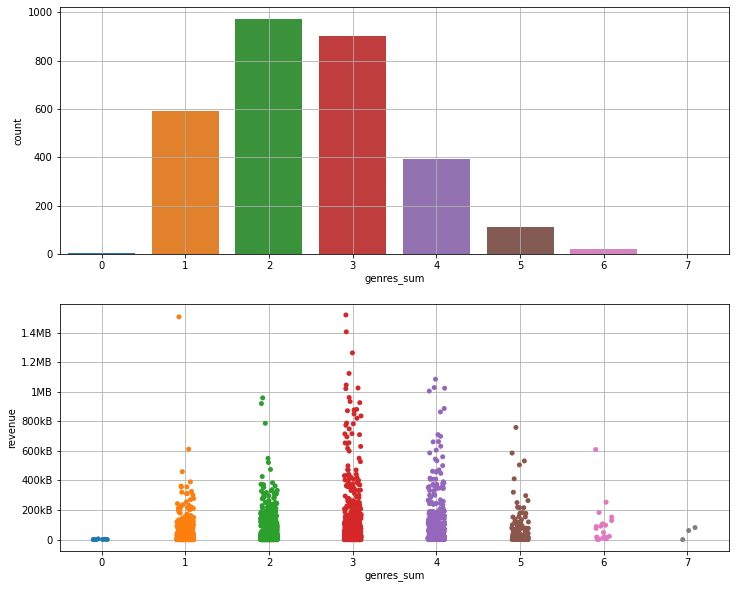

In [83]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["genres_sum"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["genres_sum"],y=y,ax=ax[1])
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

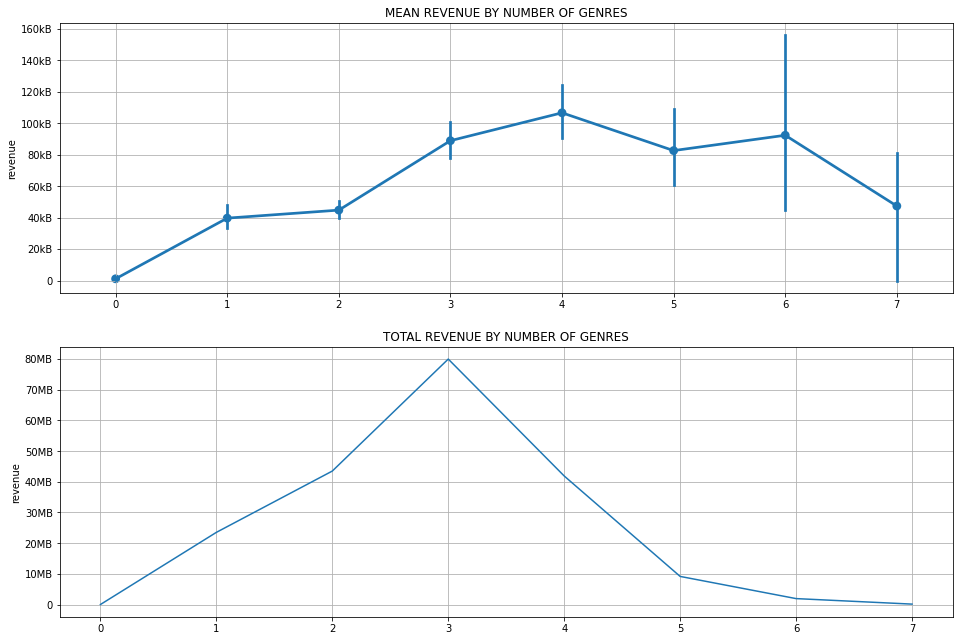

In [84]:
n_gen=Xy.groupby("genres_sum")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.pointplot(data=Xy,x="genres_sum",y="revenue",ax=ax[0],)
ax[0].set_title("MEAN REVENUE BY NUMBER OF GENRES")
ax[0].set(xlabel=None)
ax[0].grid()

sns.lineplot(data=n_gen,ax=ax[1])
ax[1].set_title("TOTAL REVENUE BY NUMBER OF GENRES")
ax[1].set(xlabel=None)
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

In [85]:
# function to search by prefix in a list, usefull to separate ohe columns
def prefix_searcher(prefix,lista):
  return [i for i in lista if prefix in i]

here we can see what are the genres who leaves greatest revenue, animation, fantasy, family, science fiction, adventure and action. 

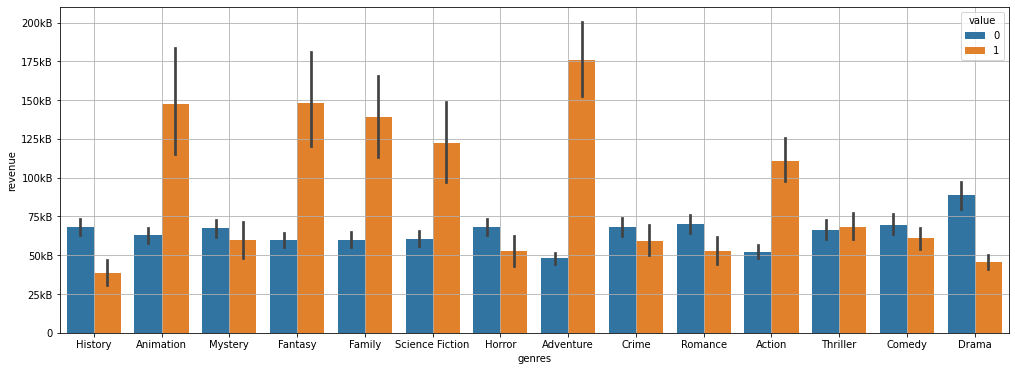

In [86]:
gens=prefix_searcher("genre_",X.columns)
gname=[]
for word in gens:
  gname.append(word.replace("genre_",""))

data=X[gens]
data.columns=gname
data=pd.concat([data,y],axis=1)
data=pd.melt(data,id_vars="revenue",var_name="genres")

fig, ax = plt.subplots(figsize=(17,6))
sns.barplot(data=data,x="genres",y="revenue",hue="value",ax=ax)
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.grid()

## Production companies

usually just 2 companies leaves more revenue, but there's no a clearly correlation

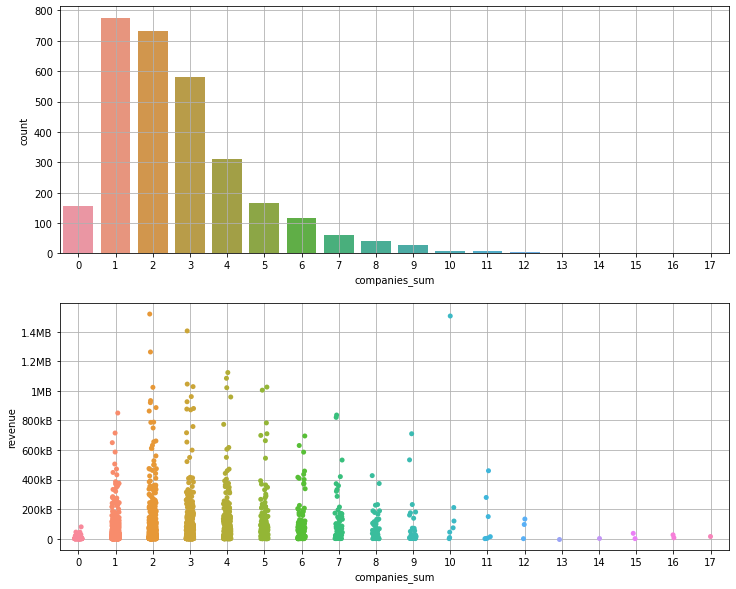

In [87]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["companies_sum"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["companies_sum"],y=y,ax=ax[1])
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

we can see that movies from Disney differ a lot from the others, with highest revenue

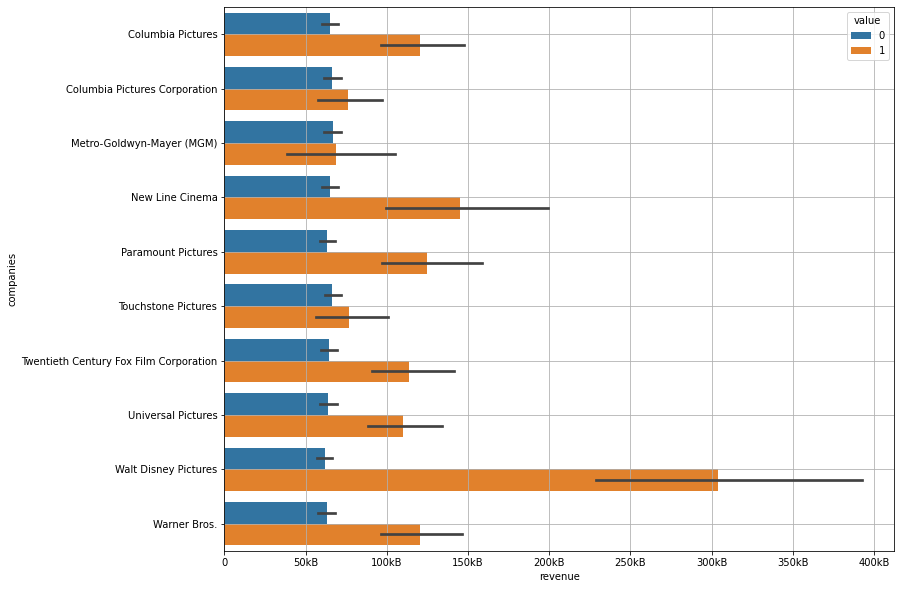

In [88]:
companies=prefix_searcher("comp_",X.columns)
pcompname=[]
for word in companies:
  pcompname.append(word.replace("comp_",""))

data=X[companies]
data.columns=pcompname
data=pd.concat([data,y],axis=1)
data=pd.melt(data,id_vars="revenue",var_name="companies")

fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(data=data,y="companies",x="revenue",hue="value")
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.grid()

## Production countries

almost all films have  just 1 production country, so its not informative at all

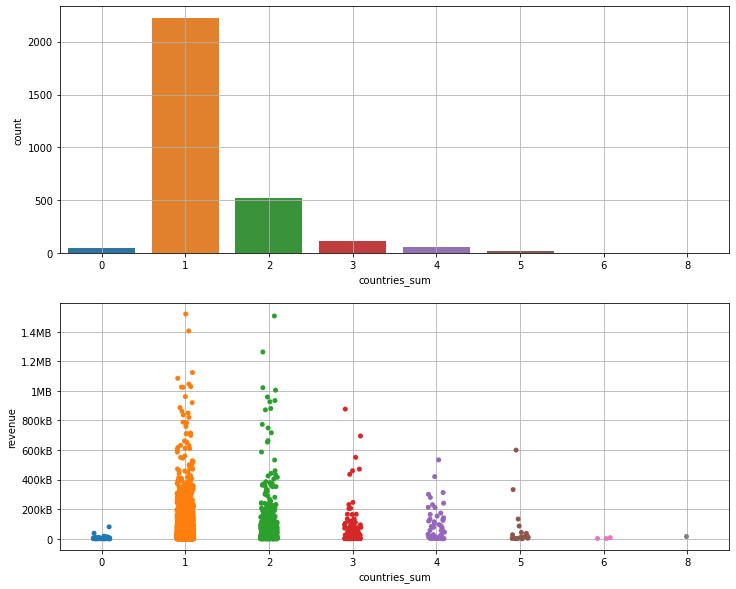

In [89]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["countries_sum"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["countries_sum"],y=y,ax=ax[1])
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

there is too much variation except in the US, which has a clear difference in income when a movie is produced there

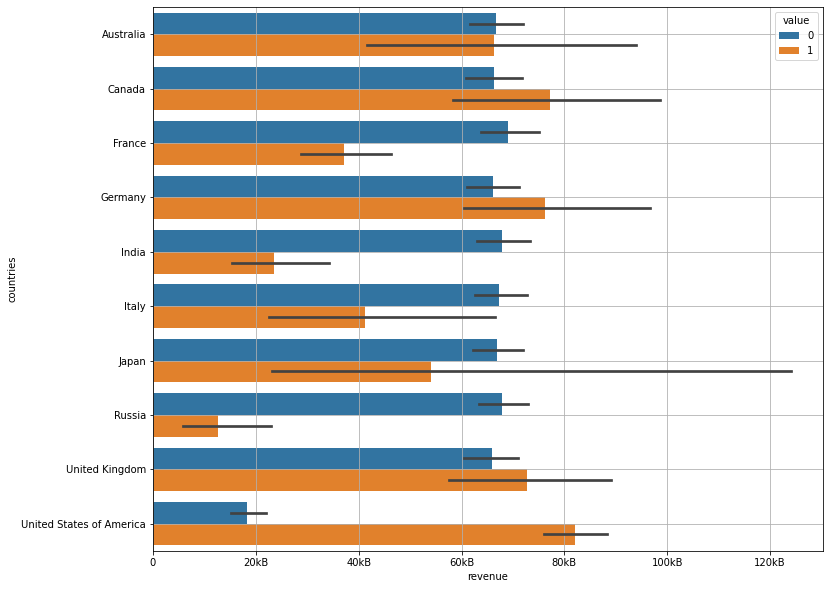

In [90]:
countries=prefix_searcher("country_",X.columns)
pcounname=[]
for word in countries:
  pcounname.append(word.replace("country_",""))

data=X[countries]
data.columns=pcounname
data=pd.concat([data,y],axis=1)
data=pd.melt(data,id_vars="revenue",var_name="countries")

fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(data=data,y="countries",x="revenue",hue="value")
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.grid()

# **FEATURE ENGINEERING**

## Missing values

now for feature selection gotta use mutual information score

In [91]:
# function to see the mutual information score for regressions
from sklearn.feature_selection import mutual_info_regression

def mi_scores(X, y, discrete_features="auto"):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

and to evaluate performance i will use cross validation

In [92]:
# funtion to score the performance of a dataset based on random forest algorithm
# the evaluation metric is Root Mean Squared Logarithmic Error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

def RMSLE(y_true,y_pred):
  from sklearn.metrics import mean_squared_error
  return np.sqrt(mean_squared_error(y_true,y_pred))

RMSLE_scorer = make_scorer(RMSLE,greater_is_better=False)

def score_dataset(X, y, model=RandomForestRegressor()):
    kf = KFold(n_splits=5, shuffle=True)
    score = cross_val_score( model, X, y, cv=kf, scoring=RMSLE_scorer )
    return print( f"{-score.mean():.4f} ± {score.std():.4f}" )

the remainder NaN values affter transform X are:

In [93]:
k=X.isna().sum()
k[k>0]

budget     812
runtime     14
dtype: int64

now we are going to look wich is the best imputation for missing values

In [94]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

si_mean=SimpleImputer(strategy="mean")
si_median=SimpleImputer(strategy="median")
si_mfre=SimpleImputer(strategy="most_frequent")
knn=KNNImputer()

BUDGET=X[["budget"]].copy()
BUDGET["nan_budget"] = X.budget.isna().astype(int)
BUDGET["budget_fill_0"] = X.budget.fillna(0)
BUDGET["budget_fill_ffill"] = X.budget.fillna(method="ffill")
BUDGET["budget_fill_mean"] = si_mean.fit_transform(X[["budget"]])
BUDGET["budget_fill_median"] = si_median.fit_transform(X[["budget"]])
BUDGET["budget_fill_mfreq"] = si_mfre.fit_transform(X[["budget"]])
BUDGET["budget_fill_knn"] = knn.fit_transform(X[["budget"]])

using mutual information we can see there's no bigger diference, so for missing values i will use the median

In [95]:
mi_scores(BUDGET.drop("budget",axis=1),y)

budget_fill_0         0.411574
budget_fill_median    0.410009
budget_fill_mfreq     0.401327
budget_fill_mean      0.398599
budget_fill_knn       0.396866
budget_fill_ffill     0.237284
nan_budget            0.112190
Name: MI Scores, dtype: float64

## Feature selection


we can see that only the first two features are strongly correlated, else have 5% or less

In [96]:
mi_scores(X.fillna(0),np.log1p(y)).head(10)

budget                              0.416141
popularity                          0.256815
companies_sum                       0.061309
country_United States of America    0.051658
genre_Adventure                     0.050402
original_language                   0.049654
date_year                           0.045122
runtime                             0.036569
genres_sum                          0.027430
comp_Universal Pictures             0.025799
Name: MI Scores, dtype: float64

so now I'll do pca to one hot enconded columns to eliminate noise

In [97]:
# plot pca explained variance ratio with cumulative and individual variance
def plot_evr_pca(df,figsize=(10,7)):
  from sklearn.decomposition import PCA
  pca=PCA(n_components=None)
  df_pca=pca.fit_transform(df)
  component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
  y=pca.explained_variance_ratio_
  cumsum_y=np.cumsum(y)
  # figure
  plt.figure(figsize=figsize)
  sns.lineplot(x=component_names,y=y,marker="o")
  sns.lineplot(x=component_names,y=cumsum_y,marker="o")
  plt.legend(["variance","cumulative variance"])
  plt.xlabel("Principal components")
  plt.ylabel("explained variance ratio")
  plt.yticks(np.arange(0,1.1,0.1))
  plt.grid()


In [98]:
genres=prefix_searcher("genre_",X)
print("list of genres: ",genres)

companies=prefix_searcher("comp_",X)
print("list of companies: ",companies)

countries=prefix_searcher("country_",X)
print("list of countries: ",countries)

list of genres:  ['genre_History', 'genre_Animation', 'genre_Mystery', 'genre_Fantasy', 'genre_Family', 'genre_Science Fiction', 'genre_Horror', 'genre_Adventure', 'genre_Crime', 'genre_Romance', 'genre_Action', 'genre_Thriller', 'genre_Comedy', 'genre_Drama']
list of companies:  ['comp_Columbia Pictures', 'comp_Columbia Pictures Corporation', 'comp_Metro-Goldwyn-Mayer (MGM)', 'comp_New Line Cinema', 'comp_Paramount Pictures', 'comp_Touchstone Pictures', 'comp_Twentieth Century Fox Film Corporation', 'comp_Universal Pictures', 'comp_Walt Disney Pictures', 'comp_Warner Bros.']
list of countries:  ['country_Australia', 'country_Canada', 'country_France', 'country_Germany', 'country_India', 'country_Italy', 'country_Japan', 'country_Russia', 'country_United Kingdom', 'country_United States of America']


I select components just before the "elbow" from the graph

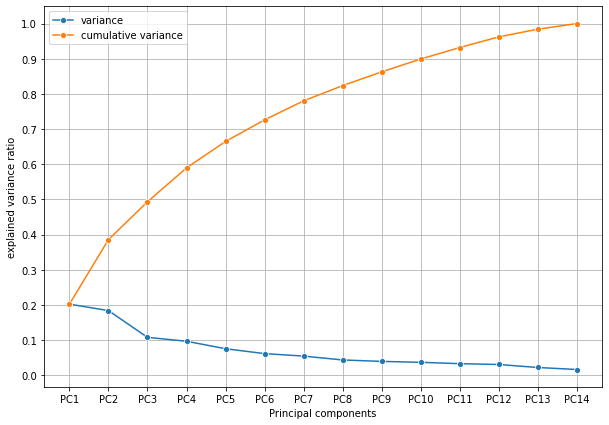

In [99]:
plot_evr_pca(X[genres])

2 components for genres

In [100]:
from sklearn.decomposition import PCA
genres_pca=PCA(n_components=2)
pca_transform=genres_pca.fit_transform(X[genres])
component_names = [f"PC{i+1}" for i in range(pca_transform.shape[1])]
pca_transform=pd.DataFrame(pca_transform, columns=component_names)
mi_scores(pca_transform,y)

PC2    0.082644
PC1    0.045612
Name: MI Scores, dtype: float64

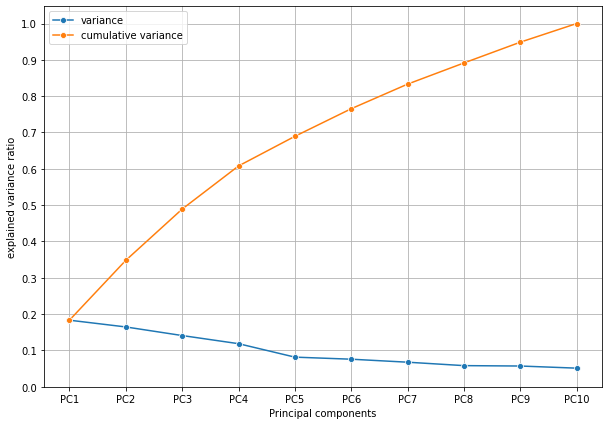

In [101]:
plot_evr_pca(X[companies])

4 components for companies

In [102]:
from sklearn.decomposition import PCA
comp_pca=PCA(n_components=4)
pca_transform=comp_pca.fit_transform(X[companies])
component_names = [f"PC{i+1}" for i in range(pca_transform.shape[1])]
pca_transform=pd.DataFrame(pca_transform, columns=component_names)
mi_scores(pca_transform,y)

PC4    0.115802
PC3    0.110278
PC2    0.108437
PC1    0.095952
Name: MI Scores, dtype: float64

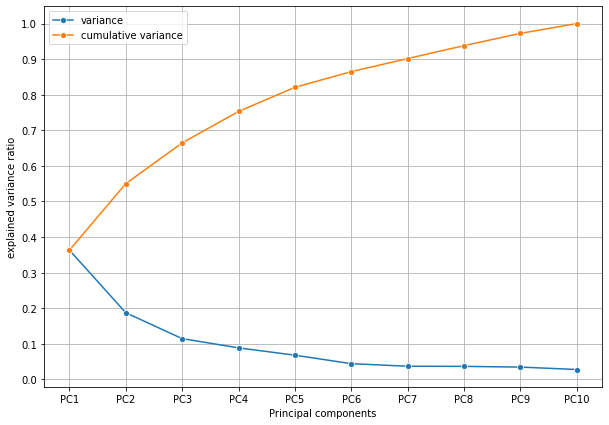

In [103]:
plot_evr_pca(X[countries])

1 component for countries

In [104]:
from sklearn.decomposition import PCA
countries_pca=PCA(n_components=1)
pca_transform=countries_pca.fit_transform(X[countries])
component_names = [f"PC{i+1}" for i in range(pca_transform.shape[1])]
pca_transform=pd.DataFrame(pca_transform, columns=component_names)
mi_scores(pca_transform,y)

PC1    0.068467
Name: MI Scores, dtype: float64

select the other features based on tree model feature importances

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=0)
features=rf.fit(X.fillna(0),np.log1p(y)).feature_importances_
features=pd.DataFrame(features,columns=["tree_based_importance"], index=X.columns)
features.sort_values("tree_based_importance",ascending=False).head(10)

,tree_based_importance
budget,0.391600
popularity,0.168114
date_year,0.094881
runtime,0.064135
date_dayofmonth,0.044473
date_month,0.031964
date_dayofweek,0.022823
companies_sum,0.020319
original_language,0.017190
genres_sum,0.017123


we select the first 5 rows who has almost 5% or more

In [106]:
features = ["budget", "popularity", "runtime", "date_year",	"date_dayofmonth"] 
pca_names=["GEN_PCA1", "GEN_PCA2"] + ["COMP_PCA1", "COMP_PCA2", "COMP_PCA3", "COMP_PCA4"] + ["COUN_PCA1"] 

make a column tranasformer with feature selection

In [107]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
preprocessor = make_column_transformer(( StandardScaler(), features ),
                                       ( PCA(n_components=2), genres ),                              
                                       ( PCA(n_components=4), companies ),
                                       ( PCA(n_components=1), countries ),
                                       )

next we make a pipeline with missing impute, and feature selection, names transformer is to create a dataframe again after imputing

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

def remind_names(numpy_matrix,names):
  return pd.DataFrame(numpy_matrix,columns=names)
names = FunctionTransformer(lambda x: remind_names(x,names=X.columns))

pipe=Pipeline([( "imputer", SimpleImputer(strategy='median') ),
               ( "remind_names", names ),
               ( "preprocessor", preprocessor )
               ])
pipe=pipe.fit_transform(X)

we can see after feature selection, that the score is better than with all data

In [109]:
score_dataset(pipe,np.log1p(y))

2.1537 ± 0.0454


In [110]:
score_dataset(X.fillna(0),np.log1p(y))

2.1680 ± 0.1049


# MODEL EVALUATION

In [111]:
# show a dataframe of gridsearchCV results sorted by model's score
def show_results(fitted_grid,header=True):
  results = pd.DataFrame(fitted_grid.cv_results_)
  results = results.set_index("rank_test_score")
  results.mean_test_score = -results.mean_test_score
  results = results[["params","mean_test_score","std_test_score"]]
  if header:
    return results.sort_index().head()
  else:
    return results.sort_index()

In [112]:
# plot the learing curve of a model
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, scoring=None , ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    _, axes = plt.subplots(1, figsize=(11, 6))
    axes.set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, __, _ = \
        learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

## Linear models

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

enet_params={}
enet_params["alpha"] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
enet_params["l1_ratio"] = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
enet_params["max_iter"] = [1, 5, 10, 100, 1000]

grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
enet_grid = GridSearchCV(estimator=ElasticNet(random_state=0), param_grid=enet_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1)
enet_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1922 out of 1925 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1925 out of 1925 | elapsed:    8.8s finished


In [114]:
results = pd.DataFrame(enet_grid.cv_results_)
results = results.set_index("rank_test_score")
results.mean_test_score = -results.mean_test_score
results = results[["param_l1_ratio","params","mean_test_score","std_test_score"]]

### Ridge regression (L2 regularization)

In [115]:
ridge = results[results.param_l1_ratio==0].sort_index()
ridge.head()

,param_l1_ratio,params,mean_test_score,std_test_score
rank_test_score,,,,
79,0,"{'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 100}",2.589918,0.158029
79,0,"{'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000}",2.589918,0.158029
81,0,"{'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 10}",2.589918,0.158029
84,0,"{'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 5}",2.589964,0.157908
85,0,"{'alpha': 0.01, 'l1_ratio': 0, 'max_iter': 100}",2.590036,0.159163


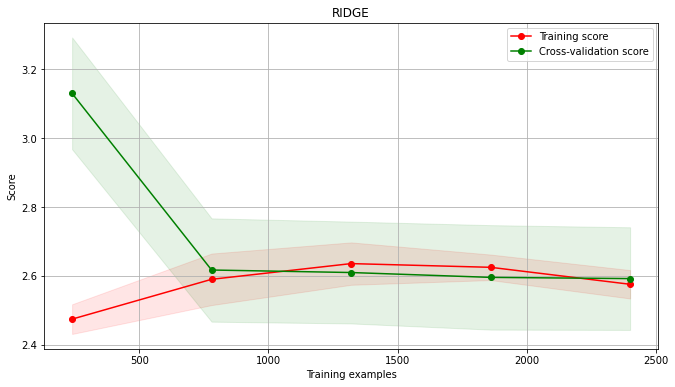

In [116]:
ridge_model=ElasticNet(alpha=0.001,l1_ratio=0,max_iter=100,tol=1)
plot_learning_curve(estimator=ridge_model, title="RIDGE", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

### Lasso regression (L1 regularization)


In [117]:
lasso=results[results.param_l1_ratio==1].sort_index()
lasso.head()

,param_l1_ratio,params,mean_test_score,std_test_score
rank_test_score,,,,
1,1,"{'alpha': 0.01, 'l1_ratio': 1, 'max_iter': 100}",2.588792,0.160067
1,1,"{'alpha': 0.01, 'l1_ratio': 1, 'max_iter': 10}",2.588792,0.160067
1,1,"{'alpha': 0.01, 'l1_ratio': 1, 'max_iter': 1000}",2.588792,0.160067
4,1,"{'alpha': 0.01, 'l1_ratio': 1, 'max_iter': 5}",2.588803,0.159963
36,1,"{'alpha': 0.001, 'l1_ratio': 1, 'max_iter': 10}",2.589743,0.158090


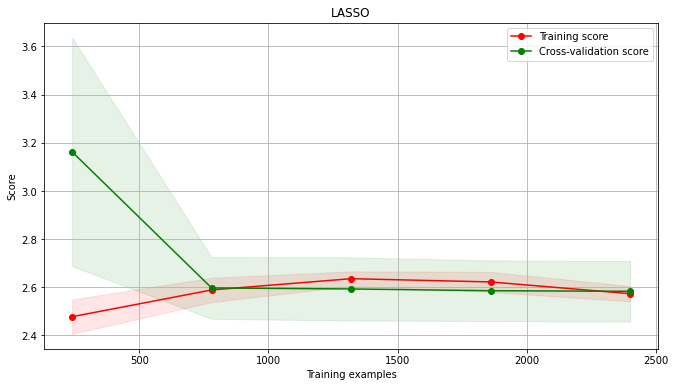

In [118]:
lasso_model=ElasticNet(alpha=0.01,l1_ratio=1,max_iter=100)
plot_learning_curve(estimator=lasso_model, title="LASSO", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

### Elastic net regression 

In [119]:
enet=results[results.param_l1_ratio != 1]
enet=enet[enet.param_l1_ratio != 0]
enet=enet.sort_index()
enet.head()

,param_l1_ratio,params,mean_test_score,std_test_score
rank_test_score,,,,
5,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1...",2.588829,0.159906
5,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 100}",2.588829,0.159906
5,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 10}",2.588829,0.159906
8,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 5}",2.588841,0.159804
9,0.8,"{'alpha': 0.01, 'l1_ratio': 0.8, 'max_iter': 1...",2.588879,0.159755


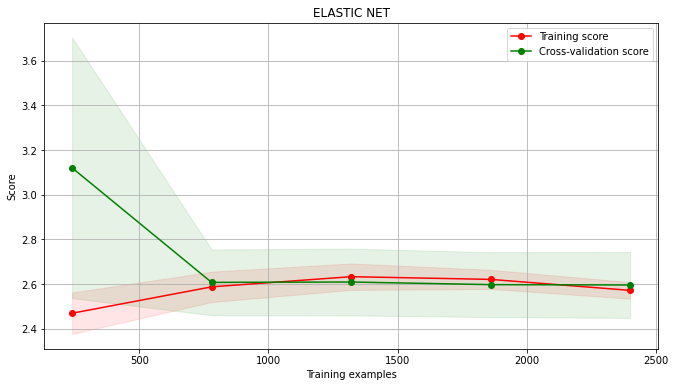

In [120]:
enet_model=ElasticNet(alpha=0.01,l1_ratio=0.9,max_iter=1000)
plot_learning_curve(estimator=enet_model, title="ELASTIC NET", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

## K-nearest neighbors regression 

In [122]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

knn_params={}
knn_params["n_neighbors"] = np.arange(1,31)
knn_params["weights"] = ["uniform", "distance"]
knn_params["algorithm"] = ["ball_tree", "kd_tree", "brute"]
knn_params["p"] = [1, 2, 3]
knn_params["metric"] = ["euclidean", "manhattan", "chebyshev", "minkowski", "seuclidean", "mahalanobis"]

grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
knn_grid = RandomizedSearchCV(n_iter=500, estimator=KNeighborsRegressor(), param_distributions=knn_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1, random_state=0)
knn_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  3.3min finished


In [123]:
show_results(knn_grid)

{'algorithm': 'kd_tree',
 'metric': 'manhattan',
 'n_neighbors': 29,
 'p': 2,
 'weights': 'distance'}

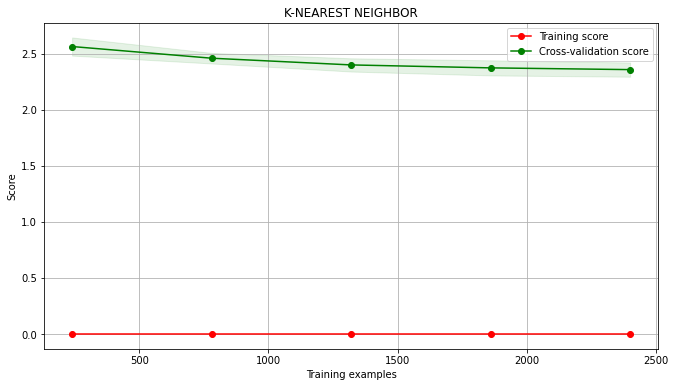

In [125]:
knn_model=knn_grid.best_estimator_
plot_learning_curve(estimator=knn_model, title="K-NEAREST NEIGHBOR", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

## Epsilon-support vector regression

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

svr_params={}
svr_params["kernel"] = ["linear", "rbf", "sigmoid"]
svr_params["gamma"] = [0.0001, 0.001, 0.01, 0.1, 10, "scale", "auto"]
svr_params["C"] = [0.1, 0.5, 1, 10, 50, 100]
svr_params["epsilon"] = [0, 0.01, 0.1, 0.5, 1, 2, 4]

grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
svr_grid = RandomizedSearchCV(n_iter=200 , estimator=SVR(), param_distributions=svr_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1,random_state=0)
svr_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 18.8min finished


In [127]:
show_results(svr_grid)

,params,mean_test_score,std_test_score
rank_test_score,,,
1,"{'kernel': 'rbf', 'gamma': 0.1, 'epsilon': 1, ...",2.305103,0.153418
2,"{'kernel': 'rbf', 'gamma': 'auto', 'epsilon': ...",2.324001,0.151952
3,"{'kernel': 'rbf', 'gamma': 'scale', 'epsilon':...",2.328784,0.153086
4,"{'kernel': 'rbf', 'gamma': 'auto', 'epsilon': ...",2.332171,0.153494
5,"{'kernel': 'rbf', 'gamma': 'scale', 'epsilon':...",2.345493,0.153323


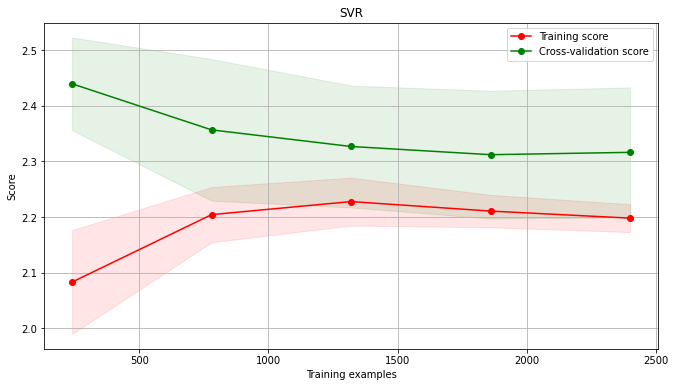

In [128]:
svr_model=svr_grid.best_estimator_
plot_learning_curve(estimator=svr_model, title="SVR", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

## Decision tree regressor

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

detree_params={}
detree_params["criterion"] = ["mse", "friedman_mse", "mae", "poisson"]
detree_params["splitter"] = ["best", "random"]
detree_params["max_depth"] = [2, 3, 5, 7, 10, 20, 50, 100, None]
detree_params["min_samples_split"] = [0.005, 0.01, 0.05, 0.1, 0.15, 0.25] #uniform distribution 0.005 to 0.25
detree_params["min_samples_leaf"] = [0.005, 0.01, 0.05, 0.1, 0.15, 0.25] #uniform distribution 0.005 to 0.25
detree_params["max_features"] = ["sqrt", "log2", None, 0.25, 0.5, 0.75] #maybe not usefull for this problem
detree_params["max_leaf_nodes"] = [None, 2, 4, 8, 16, 30, 50]

grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
detree_grid = RandomizedSearchCV(n_iter=20000, estimator=DecisionTreeRegressor(), param_distributions=detree_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1,random_state=1)
detree_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 20000 candidates, totalling 100000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 2628 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 6628 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 12228 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 19428 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 28044 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 38444 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 50444 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 62920 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 75636 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 92580 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed: 23.2min finished


In [130]:
show_results(detree_grid)

,params,mean_test_score,std_test_score
rank_test_score,,,
1,"{'splitter': 'best', 'min_samples_split': 0.05...",2.254262,0.106096
2,"{'splitter': 'best', 'min_samples_split': 0.05...",2.254875,0.135327
2,"{'splitter': 'best', 'min_samples_split': 0.05...",2.254875,0.135327
4,"{'splitter': 'best', 'min_samples_split': 0.05...",2.256166,0.133931
5,"{'splitter': 'best', 'min_samples_split': 0.05...",2.256844,0.130865


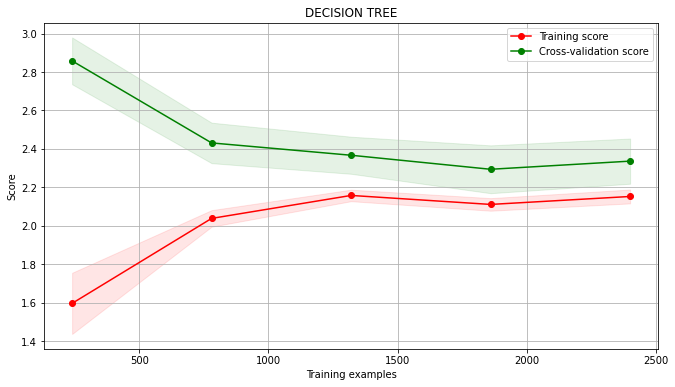

In [131]:
dt_model=detree_grid.best_estimator_
plot_learning_curve(estimator=dt_model, title="DECISION TREE", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

## Random forest regressor

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_params={}
rf_params["criterion"] = ["mse", "mae"]
rf_params["max_depth"] = [2, 4, 7, 10, None]
rf_params["min_samples_split"] = [0.005, 0.01, 0.05, 0.1, 0.15, 0.25] #uniform distribution 0.005 to 0.25
rf_params["min_samples_leaf"] = [0.005, 0.01, 0.05, 0.1, 0.15, 0.25] #uniform distribution 0.005 to 0.25
rf_params["max_features"] = ["sqrt", "log2", None, 0.25, 0.5, 0.75] 
rf_params["oob_score"] = [True, False]


grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
rf_grid = RandomizedSearchCV(n_iter=500, estimator=RandomForestRegressor(), param_distributions=rf_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1)
rf_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 54.7min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 55.8min finished


In [133]:
show_results(rf_grid)

,params,mean_test_score,std_test_score
rank_test_score,,,
1,"{'oob_score': True, 'min_samples_split': 0.01,...",2.123562,0.142152
2,"{'oob_score': False, 'min_samples_split': 0.01...",2.125754,0.136585
3,"{'oob_score': False, 'min_samples_split': 0.00...",2.141816,0.156845
4,"{'oob_score': False, 'min_samples_split': 0.05...",2.165320,0.159577
5,"{'oob_score': True, 'min_samples_split': 0.005...",2.166136,0.158969


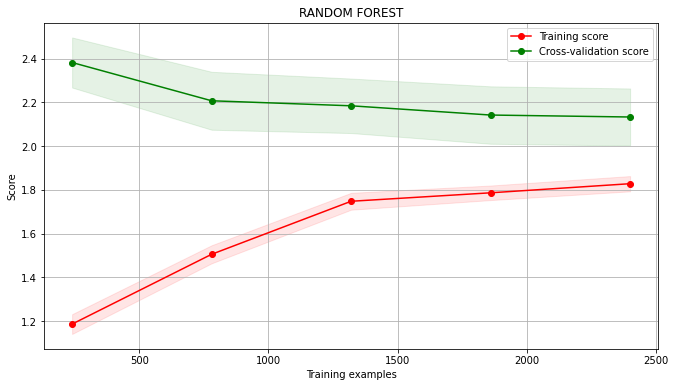

In [134]:
rf_model=rf_grid.best_estimator_
plot_learning_curve(estimator=rf_model, title="RANDOM FOREST", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

# Nueva sección

In [135]:
b=pd.DataFrame()
for i in range(8):
  b=pd.concat([pd.DataFrame(a.params.iloc[i],index=[i]),b])

NameError: ignored

In [ ]:
b

In [ ]:
score_dataset(pipe,np.log1p(y),model=RandomForestRegressor(criterion="mse",max_depth=7,max_features=0.5,min_samples_leaf=0.005,min_samples_split=0.005,oob_score=False))

i will divide the train dataset to  evaluate the performance while adding new columns

In [ ]:
def equ(d1,d2):
  return ((d1 != d2).sum().sum())==0


In [ ]:
correlation_matrix=X.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(correlation_matrix,vmax=.8)